
 After  1500  iterations value of theta is :-- [[ 340412.56301439]
 [ 109370.05670466]
 [  -6500.61509507]]

 predict cost of a 1650 sq. feet house with 3 bedrooms [ 293098.46667577]


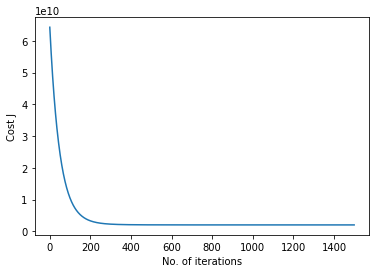

In [11]:
import numpy as np
import matplotlib.pyplot as plt

#soh contain data of first column
#nob contain data of second column
#price contain data of third column
#COST contain cost for each iteration in Gradient Descent
#t1 stores value of theta1
#t2 stores value of theta2
#t3 stores value of theta3
#means store value of mean for each column
#std_ds store value of standard deviation for each column

t1 = []
t2 = []
t3 = []
soh = []
nob = []
price = []
theta = np.zeros((3,1))
COST = list()
iterations = 1500
alpha = .01
means = []
std_ds = []

#read data from file
soh,nob,price = np.loadtxt("ex1data2.txt",unpack = True,delimiter = ',')

def FeatureNormalize(x):
    means.append(float(x.mean()))
    std_ds.append(float(x.std()))
    
    mean = x.mean()
    std_d = x.std()
    
    for i in range(len(x)):
        x[i] = (x[i] - mean)/std_d

        
#predict value for a given theta and features
def predict(theta,f1,f2,means,std_ds):
    #normalize the given input
    f1 = (f1 - means[0])/(std_ds[0])
    f2 = (f2 - means[1])/(std_ds[1])
    #predict cost
    predicted = theta[0] + theta[1]*f1 + theta[2]*f2
    return predicted


#Cost function which compute cost for a particular theta
def Compute_cost(theta,x,y,m):
    term1 = (np.dot(x,theta) - y)
    cost = (np.sum(np.multiply(term1,term1)))/(2*m)
    return cost

#batch gradient descent
def Gradient_Descent(theta,m,x,y,iterations,alpha):
    for i in range(iterations):
        term1 = (np.dot(x,theta) - y)
        theta = theta - (alpha/m)*(np.dot(x.T,term1))
        COST.append(float(Compute_cost(theta,x,y,m)))
    return theta

m = len(price)

FeatureNormalize(soh)
FeatureNormalize(nob)

#create matrix of feature normalize data
X = np.column_stack((soh,nob))
X = np.insert(X,0,1,1)
y = np.array(price).reshape(m,1)

theta = Gradient_Descent(theta,m,X,y,iterations,alpha)

print("\n After ",iterations," iterations value of theta is :--",theta)
print("\n predict cost of a 1650 sq. feet house with 3 bedrooms",predict(theta,1650,3,means,std_ds))

plt.plot(list(range(iterations)),COST)

plt.xlabel("No. of iterations")
plt.ylabel("Cost J")
plt.show()